<a href="https://colab.research.google.com/github/buraktanis/acm476/blob/main/Heart_Failure_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# **Dataset Information**

In [ ]:
# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  Cluster                   299 non-null    int32  
dtypes: float64

# **Models and Results**

In [ ]:




# Regression
# Splitting data
X = df.drop(columns=['DEATH_EVENT'])  # Features
y = df['DEATH_EVENT']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
print("Linear Regression MSE:", lr_mse)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print("Random Forest Regression MSE:", rf_mse)

# Classification
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

# Random Forest Classification
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_classifier_pred = rf_classifier.predict(X_test)
rf_classifier_accuracy = accuracy_score(y_test, rf_classifier_pred)
print("Random Forest Classification Accuracy:", rf_classifier_accuracy)

# Clustering
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels
print(df['Cluster'].value_counts())


Linear Regression MSE: 0.17868807219099922
Random Forest Regression MSE: 0.20084166666666667
Logistic Regression Accuracy: 0.8
Random Forest Classification Accuracy: 0.75
Cluster
0    192
1    107
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Graphics of Models**

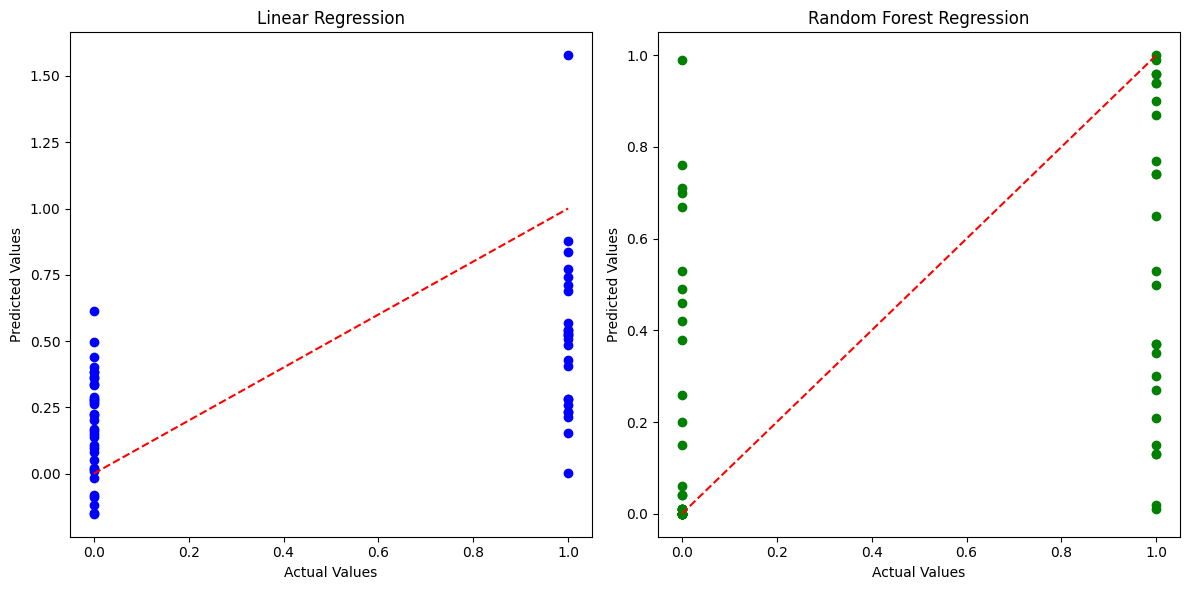

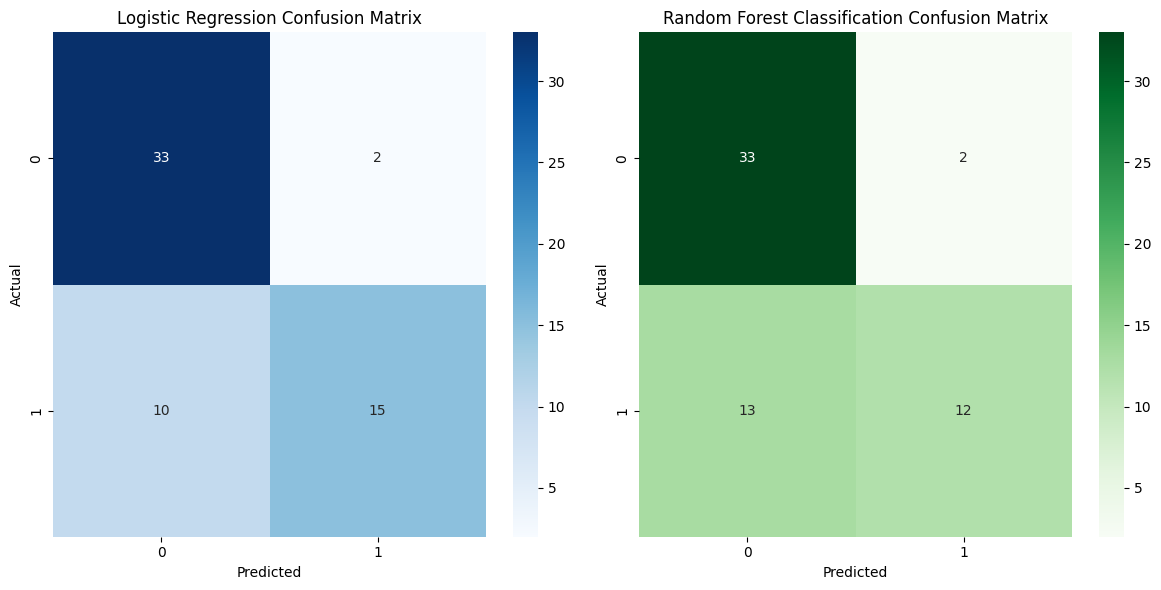

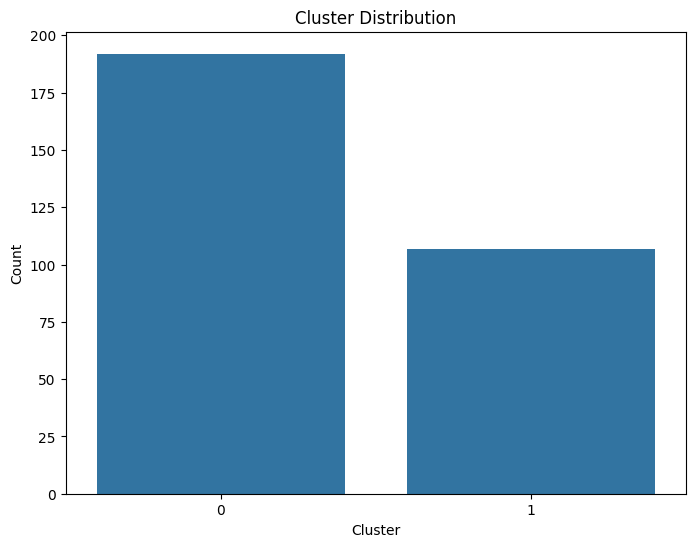

In [ ]:


# Regression Plots
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Random Forest Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Random Forest Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Classification Plots
plt.figure(figsize=(12, 6))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, log_reg_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Random Forest Classification Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, rf_classifier_pred), annot=True, cmap='Greens', fmt='g')
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Clustering Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


# **Visualizations**

In [ ]:
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                    'platelets', 'serum_creatinine', 'serum_sodium', 'time']
numeric_summary = df[numeric_features].describe()

# Draw histograms for every feature
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True)
    plt.axvline(x=numeric_summary.loc['mean', feature], color='r', linestyle='--', label='Mean')
    plt.axvline(x=numeric_summary.loc['50%', feature], color='g', linestyle='--', label='Median')
    plt.title(f"{feature.capitalize()} Distribution")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{feature}_histogram.png")
    plt.close()

# Draw boxplots for every feature
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=feature)
    plt.title(f"{feature.capitalize()} Boxplot")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Values")
    plt.tight_layout()
    plt.savefig(f"{feature}_boxplot.png")
    plt.close()

# Draw scatterplots for every feature
scatterplots = [('age', 'ejection_fraction'), ('serum_creatinine', 'serum_sodium')]
for i, (feature1, feature2) in enumerate(scatterplots, start=1):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature1, y=feature2)
    plt.title(f"{feature1.capitalize()} vs. {feature2.capitalize()} Scatterplot")
    plt.xlabel(feature1.capitalize())
    plt.ylabel(feature2.capitalize())
    plt.tight_layout()
    plt.savefig(f"{feature1}_{feature2}_scatterplot.png")
    plt.close()

# Save all the data summary
numeric_summary.to_csv("numeric_summary.csv")

# **Numeric data for every feature**

In [ ]:
df2 = pd.read_csv('numeric_summary.csv')
df2

,Unnamed: 0,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
1,mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
2,std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
3,min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
4,25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
5,50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
6,75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
7,max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000
